<a href="https://colab.research.google.com/github/w212444150/My_1st_Notebook/blob/main/L03_BrandonThompson_ITAI1371.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Look up the different libraries to understand what is being called and how it is being used

In [31]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine, make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
plt.style.use('default')
sns.set_palette("husl")

print("‚úÖ All libraries imported successfully!")
print("üöÄ Ready to start our machine learning journey!")

‚úÖ All libraries imported successfully!
üöÄ Ready to start our machine learning journey!


In [32]:
# Load the Wine dataset
wine_data = load_wine()

# Convert to DataFrame for easier handling
df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
df['wine_class'] = wine_data.target
df['wine_class_name'] = [wine_data.target_names[i] for i in wine_data.target]

print("Dataset Information:")
print(f"Shape: {df.shape}")
print(f"Features: {len(wine_data.feature_names)}")
print(f"Classes: {wine_data.target_names}")
print(f"\nFirst 5 rows:")
print(df.head())

Dataset Information:
Shape: (178, 15)
Features: 13
Classes: ['class_0' 'class_1' 'class_2']

First 5 rows:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39

In [33]:
# Explore the dataset structure
print("Dataset Overview:")
print("=" * 50)
print(f"Total samples: {len(df)}")
print(f"Features (input variables): {len(df.columns) - 2}")  # -2 for target columns
print(f"Target classes: {df['wine_class_name'].unique()}")
print(f"\nClass distribution:")
print(df['wine_class_name'].value_counts())

# Check for missing values
print(f"\nMissing values: {df.isnull().sum().sum()}")
print("‚úÖ No missing values - this is a clean dataset!")

Dataset Overview:
Total samples: 178
Features (input variables): 13
Target classes: [np.str_('class_0') np.str_('class_1') np.str_('class_2')]

Class distribution:
wine_class_name
class_1    71
class_0    59
class_2    48
Name: count, dtype: int64

Missing values: 0
‚úÖ No missing values - this is a clean dataset!


**Understanding the data...and the computer vision (McManus) skills recently covered used in this assignment

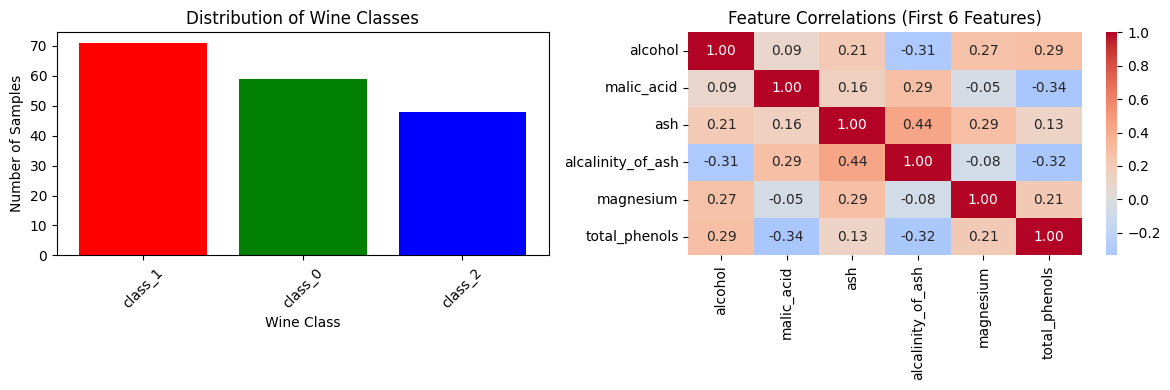

üìä EDA helps us understand:
- Class balance (are all classes equally represented?)
- Feature relationships (which features are correlated?)
- Data quality (any outliers or issues?)


In [34]:
# Visualize class distribution
plt.figure(figsize=(12, 4))

# Subplot 1: Class distribution
plt.subplot(1, 2, 1)
class_counts = df['wine_class_name'].value_counts()
plt.bar(class_counts.index, class_counts.values, color=['red', 'green', 'blue'])
plt.title('Distribution of Wine Classes')
plt.xlabel('Wine Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)

# Subplot 2: Feature correlation heatmap (first 6 features for clarity)
plt.subplot(1, 2, 2)
correlation_matrix = df.iloc[:, :6].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlations (First 6 Features)')

plt.tight_layout()
plt.show()

print("üìä EDA helps us understand:")
print("- Class balance (are all classes equally represented?)")
print("- Feature relationships (which features are correlated?)")
print("- Data quality (any outliers or issues?)")

Part 5: 6-step ML Workflow

In [35]:
# Step 1: Data Preparation
print("Step 1: Data Preparation")
print("=" * 30)

# Select features (X) and target (y)
# For simplicity, let's use the first 4 features
feature_names = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash']
X = df[feature_names]
y = df['wine_class']

print(f"Selected features: {feature_names}")
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Display first few rows
print("\nFirst 5 samples:")
print(X.head())

Step 1: Data Preparation
Selected features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash']
Feature matrix shape: (178, 4)
Target vector shape: (178,)

First 5 samples:
   alcohol  malic_acid   ash  alcalinity_of_ash
0    14.23        1.71  2.43               15.6
1    13.20        1.78  2.14               11.2
2    13.16        2.36  2.67               18.6
3    14.37        1.95  2.50               16.8
4    13.24        2.59  2.87               21.0


In [36]:
# Step 2: Data Splitting
print("Step 2: Data Splitting")
print("=" * 30)

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% for testing
    random_state=42,    # For reproducible results
    stratify=y          # Maintain class proportions
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Training classes: {np.bincount(y_train)}")
print(f"Testing classes: {np.bincount(y_test)}")

print("\nüéØ Why split data?")
print("- Training set: Teach the model")
print("- Testing set: Evaluate performance on unseen data")
print("- This prevents overfitting (memorizing vs. learning)")

Step 2: Data Splitting
Training set: 142 samples
Testing set: 36 samples
Training classes: [47 57 38]
Testing classes: [12 14 10]

üéØ Why split data?
- Training set: Teach the model
- Testing set: Evaluate performance on unseen data
- This prevents overfitting (memorizing vs. learning)


In [37]:
# Step 3: Model Training
print("Step 3: Model Training")
print("=" * 30)

# Create and train two different models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=3)
}

trained_models = {}

for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    model.fit(X_train, y_train)
    trained_models[name] = model

    print(f"‚úÖ {name} training completed!")

print("\nü§ñ What happened during training?")
print("- Models learned patterns from training data")
print("- They found relationships between features and wine classes")
print("- Now they can make predictions on new data!")

Step 3: Model Training

Training Logistic Regression...
‚úÖ Logistic Regression training completed!

Training Decision Tree...
‚úÖ Decision Tree training completed!

ü§ñ What happened during training?
- Models learned patterns from training data
- They found relationships between features and wine classes
- Now they can make predictions on new data!


In [38]:
# Step 4: Model Evaluation
print("Step 4: Model Evaluation")
print("=" * 30)

results = {}

for name, model in trained_models.items():
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")

    # Detailed classification report
    print("\nDetailed Performance:")
    print(classification_report(y_test, y_pred, target_names=wine_data.target_names))

# Compare models
print("\nüìä Model Comparison:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.3f}")

best_model = max(results, key=results.get)
print(f"\nüèÜ Best performing model: {best_model}")

Step 4: Model Evaluation

Logistic Regression Results:
Accuracy: 0.889 (88.9%)

Detailed Performance:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.81      0.93      0.87        14
     class_2       0.88      0.70      0.78        10

    accuracy                           0.89        36
   macro avg       0.90      0.88      0.88        36
weighted avg       0.89      0.89      0.89        36


Decision Tree Results:
Accuracy: 0.833 (83.3%)

Detailed Performance:
              precision    recall  f1-score   support

     class_0       0.86      1.00      0.92        12
     class_1       0.91      0.71      0.80        14
     class_2       0.73      0.80      0.76        10

    accuracy                           0.83        36
   macro avg       0.83      0.84      0.83        36
weighted avg       0.84      0.83      0.83        36


üìä Model Comparison:
Logistic Regression: 0.889
Decision Tree:

Step 5: Model Interpretation


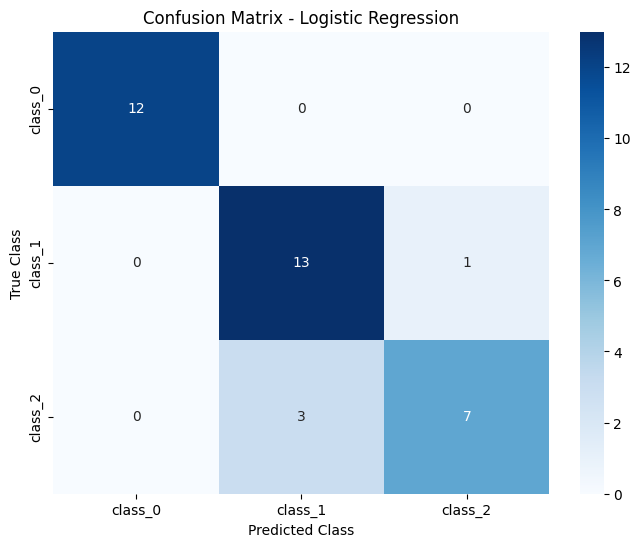


üîç Interpreting the Confusion Matrix:
- Diagonal values: Correct predictions
- Off-diagonal values: Misclassifications
- Perfect model would have all values on diagonal


In [39]:
# Step 5: Model Interpretation
print("Step 5: Model Interpretation")
print("=" * 30)

# Visualize confusion matrix for the best model
best_model_obj = trained_models[best_model]
y_pred_best = best_model_obj.predict(X_test)

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=wine_data.target_names,
            yticklabels=wine_data.target_names)
plt.title(f'Confusion Matrix - {best_model}')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

print(f"\nüîç Interpreting the Confusion Matrix:")
print("- Diagonal values: Correct predictions")
print("- Off-diagonal values: Misclassifications")
print("- Perfect model would have all values on diagonal")

In [40]:
# Understanding Different Data Types in ML
print("Understanding Data Types in Machine Learning")
print("=" * 45)

# Create examples of different data types
data_examples = {
    'Numerical (Continuous)': [23.5, 45.2, 67.8, 12.1, 89.3],
    'Numerical (Discrete)': [1, 5, 3, 8, 2],
    'Categorical (Nominal)': ['Red', 'Blue', 'Green', 'Red', 'Blue'],
    'Categorical (Ordinal)': ['Low', 'Medium', 'High', 'Medium', 'Low'],
    'Text': ['Hello world', 'Machine learning', 'Data science', 'Python programming', 'AI revolution'],
    'Boolean': [True, False, True, True, False]
}

for data_type, examples in data_examples.items():
    print(f"\n{data_type}:")
    print(f"  Examples: {examples}")
    print(f"  Use case: ", end="")

    if 'Continuous' in data_type:
        print("Regression problems (predicting prices, temperatures)")
    elif 'Discrete' in data_type:
        print("Counting problems (number of items, ratings)")
    elif 'Nominal' in data_type:
        print("Classification without order (colors, categories)")
    elif 'Ordinal' in data_type:
        print("Classification with order (ratings, sizes)")
    elif 'Text' in data_type:
        print("Natural language processing (sentiment analysis, translation)")
    elif 'Boolean' in data_type:
        print("Binary classification (yes/no, spam/not spam)")

print("\nüí° Key Insight: Different data types require different preprocessing and algorithms!")

Understanding Data Types in Machine Learning

Numerical (Continuous):
  Examples: [23.5, 45.2, 67.8, 12.1, 89.3]
  Use case: Regression problems (predicting prices, temperatures)

Numerical (Discrete):
  Examples: [1, 5, 3, 8, 2]
  Use case: Counting problems (number of items, ratings)

Categorical (Nominal):
  Examples: ['Red', 'Blue', 'Green', 'Red', 'Blue']
  Use case: Classification without order (colors, categories)

Categorical (Ordinal):
  Examples: ['Low', 'Medium', 'High', 'Medium', 'Low']
  Use case: Classification with order (ratings, sizes)

Text:
  Examples: ['Hello world', 'Machine learning', 'Data science', 'Python programming', 'AI revolution']
  Use case: Natural language processing (sentiment analysis, translation)

Boolean:
  Examples: [True, False, True, True, False]
  Use case: Binary classification (yes/no, spam/not spam)

üí° Key Insight: Different data types require different preprocessing and algorithms!


**Learn how to build a model with my selected features.

In [41]:
# Task 1: Try different features
print("Task 1: Experiment with Different Features")
print("=" * 40)

# Your task: Select 3 different features and build a model
# Available features:
print("Available features:")
for i, feature in enumerate(wine_data.feature_names):
    print(f"{i+1:2d}. {feature}")

# TODO: Replace these with your chosen features
your_features = ['hue', 'proline', 'od280/od315_of_diluted_wines']  # Modify this list

# Build model with your features
X_your = df[your_features]
X_train_your, X_test_your, y_train_your, y_test_your = train_test_split(
    X_your, y, test_size=0.2, random_state=42, stratify=y
)

# Train a logistic regression model
your_model = LogisticRegression(random_state=42)
your_model.fit(X_train_your, y_train_your)

# Evaluate
y_pred_your = your_model.predict(X_test_your)
your_accuracy = accuracy_score(y_test_your, y_pred_your)

print(f"\nYour model features: {your_features}")
print(f"Your model accuracy: {your_accuracy:.3f} ({your_accuracy*100:.1f}%)")

# Compare with original model
print(f"Original model accuracy: {results['Logistic Regression']:.3f}")
if your_accuracy > results['Logistic Regression']:
    print("üéâ Great job! Your feature selection improved the model!")
else:
    print("ü§î Try different features to see if you can improve performance!")

Task 1: Experiment with Different Features
Available features:
 1. alcohol
 2. malic_acid
 3. ash
 4. alcalinity_of_ash
 5. magnesium
 6. total_phenols
 7. flavanoids
 8. nonflavanoid_phenols
 9. proanthocyanins
10. color_intensity
11. hue
12. od280/od315_of_diluted_wines
13. proline

Your model features: ['hue', 'proline', 'od280/od315_of_diluted_wines']
Your model accuracy: 0.917 (91.7%)
Original model accuracy: 0.889
üéâ Great job! Your feature selection improved the model!


In [42]:
print("‚úìI'll code this to maintain the format:\nFlavanoids üçá , magnesium and ash had similar model accuracy üíØ.\nMalic acid, ash and alcalinity of ash performed significantly worse with 0.667 (66.7%) ‚ùå.\nMy next model did very well (91.7%)ü•≥ and consisted of od280/od315_of_diluted_wines, hue and proline.")

‚úìI'll code this to maintain the format:
Flavanoids üçá , magnesium and ash had similar model accuracy üíØ.
Malic acid, ash and alcalinity of ash performed significantly worse with 0.667 (66.7%) ‚ùå.
My next model did very well (91.7%)ü•≥ and consisted of od280/od315_of_diluted_wines, hue and proline.


In [43]:
# Assessment Task 1: Identify the ML type
print("Assessment Task 1: Identify Machine Learning Types")
print("=" * 50)

# For each scenario, identify if it's Supervised, Unsupervised, or Reinforcement Learning

scenarios = [
    "Predicting house prices based on size, location, and age",
    "Grouping customers by purchasing behavior without knowing groups beforehand",
    "Teaching a robot to play chess by playing many games",
    "Classifying emails as spam or not spam using labeled examples",
    "Finding hidden topics in news articles without predefined categories"
]

# Your answers (replace 'TYPE' with Supervised, Unsupervised, or Reinforcement)
your_answers = [
    "Supervised",      # Scenario 1
    "Unsupervised",    # Scenario 2
    "Reinforcement",   # Scenario 3
    "Supervised",      # Scenario 4
    "Unsupervised"     # Scenario 5
]

# Check answers
correct_answers = ["Supervised", "Unsupervised", "Reinforcement", "Supervised", "Unsupervised"]

print("Scenario Analysis:")
score = 0
for i, (scenario, your_answer, correct) in enumerate(zip(scenarios, your_answers, correct_answers)):
    is_correct = your_answer == correct
    score += is_correct
    status = "‚úÖ" if is_correct else "‚ùå"
    print(f"{status} {i+1}. {scenario}")
    print(f"   Your answer: {your_answer} | Correct: {correct}")
    print()

print(f"Score: {score}/{len(scenarios)} ({score/len(scenarios)*100:.0f}%)")
print("I noticed the scenarios were/are labeled correctly to begin with as I went through to label them.\nNo need to change any of them.")

Assessment Task 1: Identify Machine Learning Types
Scenario Analysis:
‚úÖ 1. Predicting house prices based on size, location, and age
   Your answer: Supervised | Correct: Supervised

‚úÖ 2. Grouping customers by purchasing behavior without knowing groups beforehand
   Your answer: Unsupervised | Correct: Unsupervised

‚úÖ 3. Teaching a robot to play chess by playing many games
   Your answer: Reinforcement | Correct: Reinforcement

‚úÖ 4. Classifying emails as spam or not spam using labeled examples
   Your answer: Supervised | Correct: Supervised

‚úÖ 5. Finding hidden topics in news articles without predefined categories
   Your answer: Unsupervised | Correct: Unsupervised

Score: 5/5 (100%)
I noticed the scenarios were/are labeled correctly to begin with as I went through to label them.
No need to change any of them.


## My Reflection and Analysis

** I Completed the reflection below by editing this markdown cell.

### My Understanding of Machine Learning Types

**Supervised Learning**: [Feeding systems large datasets so the algorithm learns to associate patterns with correct labels such as defense companies utilizing drone technology. i.e Anduril's drones and sentry towers.]

**Unsupervised Learning**: [Finding patterns not easily or typically found by humans without labeled examples. Used to find irregular patterns in medical imaging to help detect diseases sooner]

**Reinforcement Learning**: [Systems learn optimal strategies through trial and error and adapt over time to ever changing environments, i.e. algorithmic trading and robots performing surgeries]

### My Analysis of the Wine Classification Project

**Best performing model**: [Logistic Regression was the best performing model.]

**Why do you think this model performed better?**: [Logistic regression is great for small datasets, particularly for predicting categories. It is not likely to memorize therefore overfitting is not an issue.]

**What would you try next to improve performance?**: [I would research other features and implement or replace the data into the datasets. I would try different models such as Random Forrest, etc.]

### Real-World Application Ideas

**Industry of Interest**: [Agriculture]

**ML Problem**: [To classify and detect plant diseases to help farmers catch problems earlier to avoid unnecessary losses. ]

**Type of ML**: [Supervised]  

**Data Needed**: [Thousands of images of healthy and diseased plant leaves labeled with "healthy" or "type of disease"]

### Key Learnings

**Most important concept learned**: [If the features do not vary much, the accuracy drops.  ]

**Most challenging part**: [Understanding why some features matter more than others. It was tricky to figure out which features would help the model to perform best.]

**Questions for further exploration**: How do I know which features work best without trying every combination? What other models might work better than Logistic Regression? What would happen if I were to use all 13 features instead of the 3? Would it improve accuracy?